In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
file_path = '/Users/gim-yuseong/Desktop/PycharmProjects/2024_3-1AI/seeds_dataset.txt'

column_names = ["area ", "perimeter ", "compactness ", "length of kernel", "width of kernel", "asymmetry coefficient", "length of kernel groove", "class"]          

df = pd.read_csv(file_path, header=None, names=column_names, delimiter='\s+')
df.head(10)

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,1
7,14.11,14.10,0.8911,5.420,3.302,2.700,5.000,1
8,16.63,15.46,0.8747,6.053,3.465,2.040,5.877,1
9,16.44,15.25,0.8880,5.884,3.505,1.969,5.533,1


In [3]:
# 결측치 확인
df.isnull().sum()

area                       0
perimeter                  0
compactness                0
length of kernel           0
width of kernel            0
asymmetry coefficient      0
length of kernel groove    0
class                      0
dtype: int64

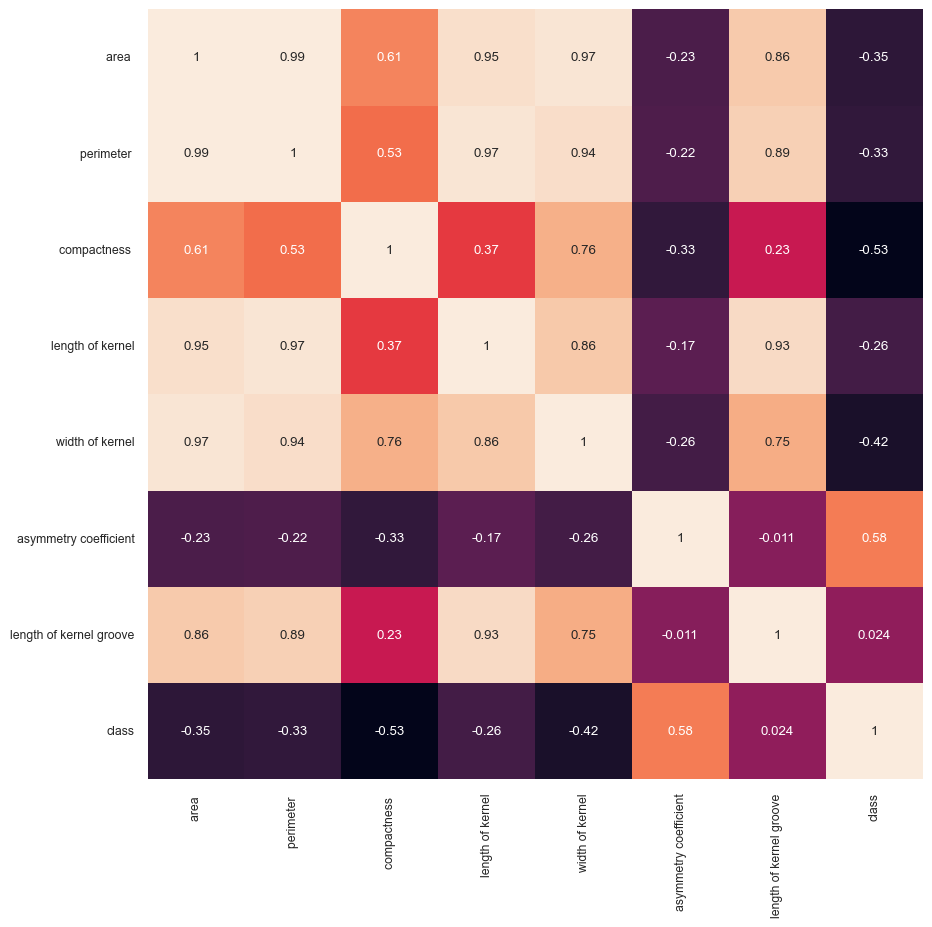

In [4]:
import seaborn as sns

import matplotlib.pyplot as plt

import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

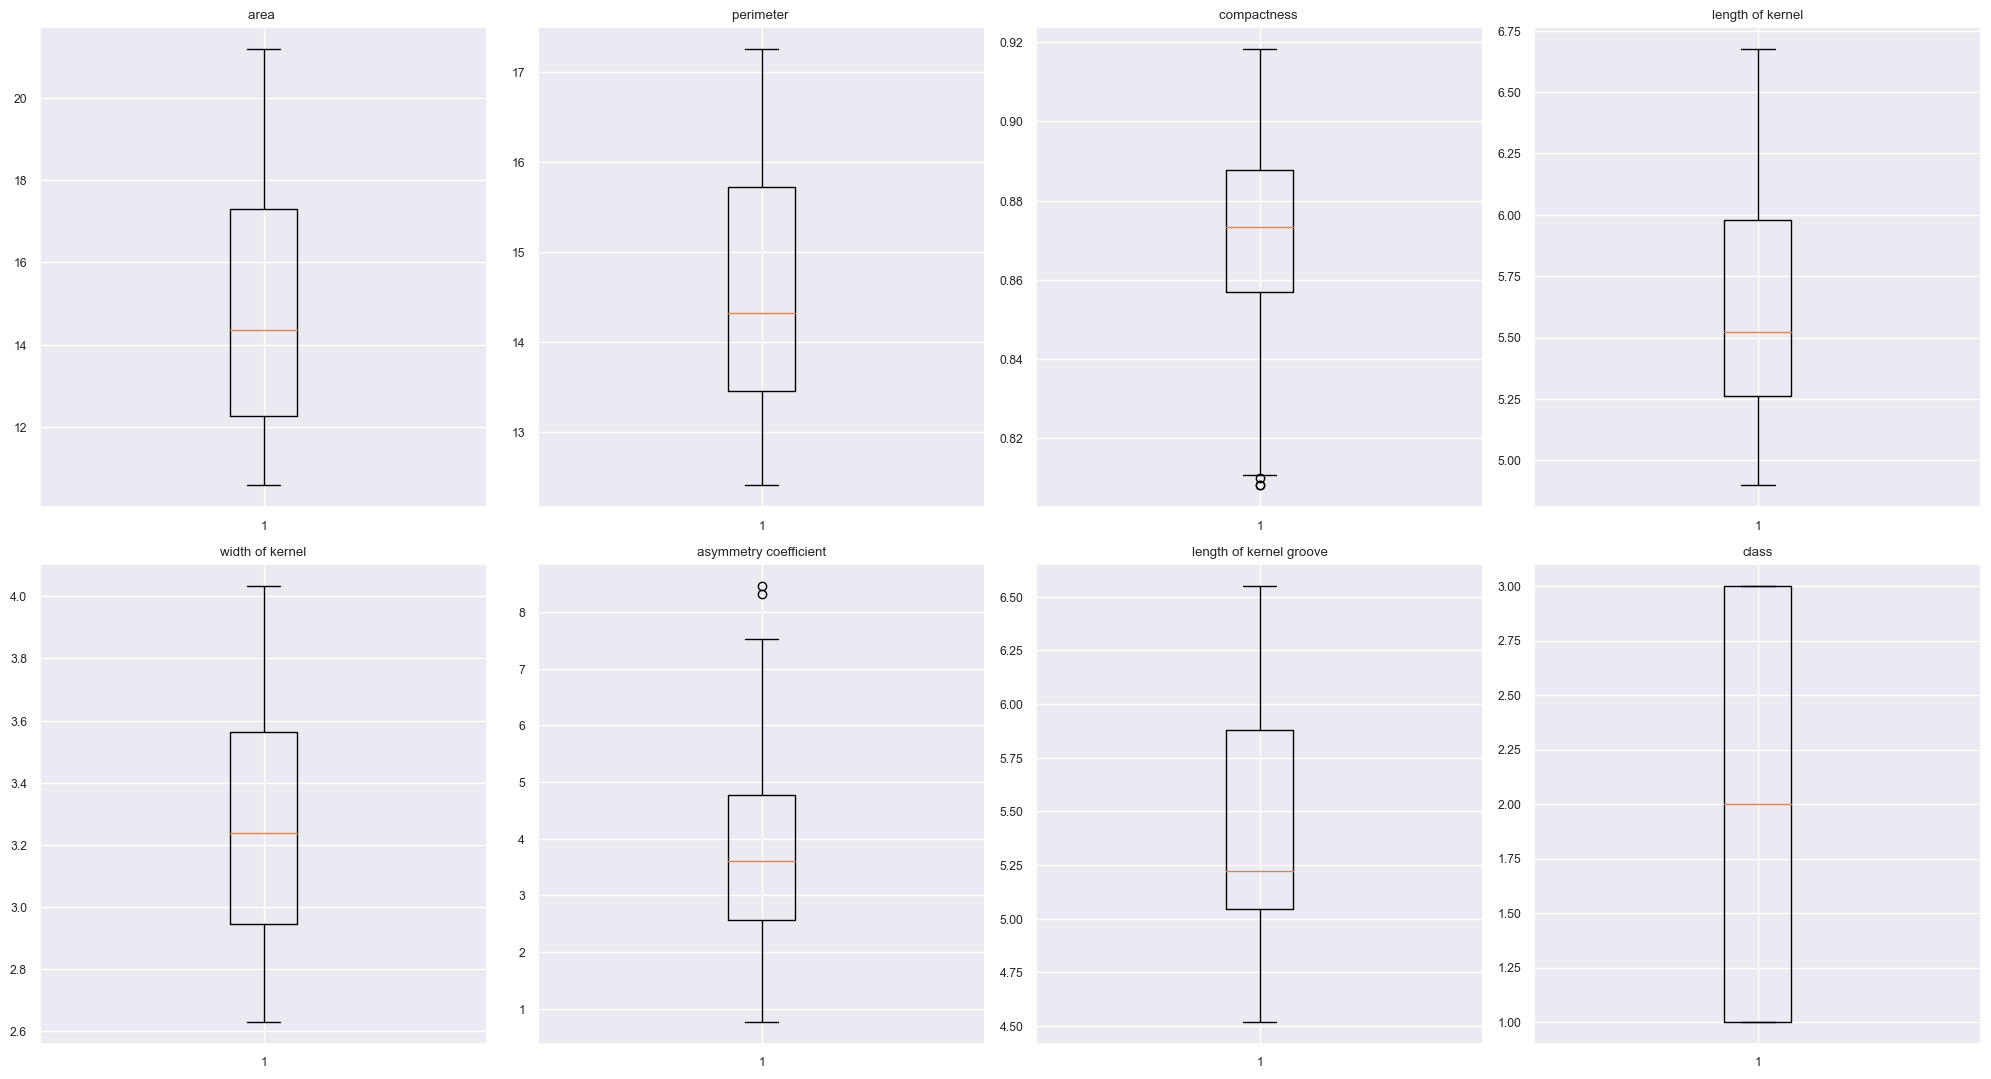

In [5]:
# 박스 플롯 그리기
plt.figure(figsize=(20, 16))
for i, column in enumerate(df.columns):
    plt.subplot(3, 4, i+1)
    plt.boxplot(df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Label')

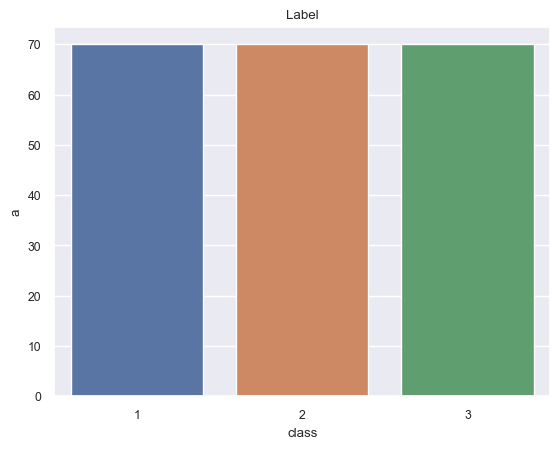

In [6]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="class")
plt.ylabel("a")
plt.title("Label")

In [7]:
# 레이블 갯수 확인 (숫자)
df['class'].value_counts()

1    70
2    70
3    70
Name: class, dtype: int64

In [8]:
from sklearn.preprocessing import StandardScaler

# 표준화(Standardization)
scaler = StandardScaler()
scaled_data_standard = scaler.fit_transform(df.drop('class', axis=1))  # rings 열 제외하고 표준화
scaled_df_standard = pd.DataFrame(scaled_data_standard, columns=df.columns[:-1])  # 데이터프레임으로 변환
scaled_df_standard

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove
0,0.142098,0.215462,0.000061,0.304218,0.141702,-0.986152,-0.383577
1,0.011188,0.008224,0.428515,-0.168625,0.197432,-1.788166,-0.922013
2,-0.192067,-0.360201,1.442383,-0.763637,0.208048,-0.667479,-1.189192
3,-0.347091,-0.475333,1.039381,-0.688978,0.319508,-0.960818,-1.229983
4,0.445257,0.330595,1.374509,0.066666,0.805159,-1.563495,-0.475356
...,...,...,...,...,...,...,...
205,-0.915515,-1.043321,0.309736,-1.112048,-0.736716,-0.046135,-1.097413
206,-1.246235,-1.288937,-0.844122,-1.105261,-1.230328,0.416540,-0.826156
207,-0.567571,-0.690247,0.733948,-0.888070,-0.070604,3.076588,-0.718060
208,-1.036090,-1.035645,-0.801701,-1.026077,-1.121521,-0.068135,-0.742535


In [9]:
x=scaled_df_standard
X = x.values
X

array([[ 1.42097769e-01,  2.15462437e-01,  6.06017918e-05, ...,
         1.41701823e-01, -9.86151745e-01, -3.83577423e-01],
       [ 1.11880257e-02,  8.22375713e-03,  4.28515270e-01, ...,
         1.97432229e-01, -1.78816620e+00, -9.22013487e-01],
       [-1.92066576e-01, -3.60200562e-01,  1.44238325e+00, ...,
         2.08047544e-01, -6.67479334e-01, -1.18919199e+00],
       ...,
       [-5.67570840e-01, -6.90247348e-01,  7.33948301e-01, ...,
        -7.06044846e-02,  3.07658816e+00, -7.18060432e-01],
       [-1.03608992e+00, -1.03564515e+00, -8.01701104e-01, ...,
        -1.12152071e+00, -6.81351965e-02, -7.42534799e-01],
       [-8.77620233e-01, -9.35863561e-01, -1.10234659e-01, ...,
        -7.55292327e-01,  1.29122264e+00, -7.03783718e-01]])

In [10]:
y = df['class']
Y = pd.get_dummies(y).values

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1,

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.25,random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(157, 7) (53, 7) (157, 3) (53, 3)


In [12]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

In [13]:
import tensorflow as tf

inputs = tf.keras.Input(shape=(7,))

x1 = tf.keras.layers.Flatten()(inputs)
x2 = tf.keras.layers.Dense(64, activation='relu')(x1)
x2 = tf.keras.layers.Dropout(0.5)(x2)  
x3 = tf.keras.layers.Dense(32, activation='relu')(x2)
x3 = tf.keras.layers.Dropout(0.5)(x3)  

outputs = tf.keras.layers.Dense(3, activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7)]               0         
                                                                 
 flatten (Flatten)           (None, 7)                 0         
                                                                 
 dense (Dense)               (None, 64)                512       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 99    

In [14]:
from keras.callbacks import EarlyStopping

# early_stopping = EarlyStopping() 그냥 하니까 epoch를 2번만 돌려서 매개변수 추가
early_stopping = EarlyStopping(patience=5)

model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test), callbacks = [early_stopping])
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
5/5 [==============================] - 1s 70ms/step - loss: 1.1439 - accuracy: 0.3822 - val_loss: 1.0094 - val_accuracy: 0.5094
Epoch 2/100
5/5 [==============================] - 0s 11ms/step - loss: 1.0131 - accuracy: 0.4841 - val_loss: 0.9144 - val_accuracy: 0.6981
Epoch 3/100
5/5 [==============================] - 0s 11ms/step - loss: 0.9314 - accuracy: 0.5987 - val_loss: 0.8285 - val_accuracy: 0.8302
Epoch 4/100
5/5 [==============================] - 0s 13ms/step - loss: 0.8917 - accuracy: 0.6051 - val_loss: 0.7510 - val_accuracy: 0.8679
Epoch 5/100
5/5 [==============================] - 0s 10ms/step - loss: 0.8140 - accuracy: 0.6688 - val_loss: 0.6844 - val_accuracy: 0.8868
Epoch 6/100
5/5 [==============================] - 0s 10ms/step - loss: 0.7773 - accuracy: 0.6879 - val_loss: 0.6255 - val_accuracy: 0.8868
Epoch 7/100
5/5 [==============================] - 0s 10ms/step - loss: 0.7075 - accuracy: 0.7771 - val_loss: 0.5722 - val_accuracy: 0.8868
Epoch 8/100
5/5 [===

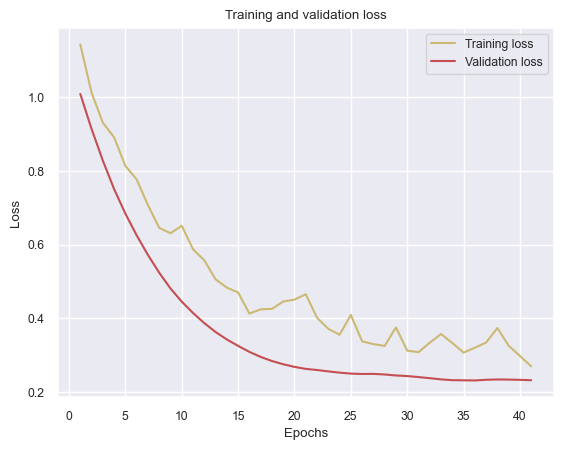

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81        17
           1       0.95      0.90      0.93        21
           2       0.83      1.00      0.91        15

    accuracy                           0.89        53
   macro avg       0.88      0.89      0.88        53
weighted avg       0.89      0.89      0.89        53

[[13  1  3]
 [ 2 19  0]
 [ 0  0 15]]
